In [69]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Lists' manipulations
import itertools

# Gaussianity
from statsmodels.graphics.gofplots import qqplot    # Gaussianity

# Stats
from scipy.stats import skew,kurtosis,zscore

# Machine Learning - Preprocessing the Dataset
from sklearn.preprocessing import RobustScaler      # Scaling Numerical Features
from sklearn.preprocessing import OneHotEncoder     # Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder     # Encoding the Target


# Machine Learning - "Workflow"
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config; set_config(display = "diagram")

# Machine Learning - Tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import time

# Classification Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Machine Learning Classifiers

## Classics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Decision Trees
from sklearn.tree import DecisionTreeClassifier

## Random Forests
from sklearn.ensemble import RandomForestClassifier

## Bootstrap Aggregating
from sklearn.ensemble import BaggingClassifier

## Adaboost
from sklearn.ensemble import AdaBoostClassifier

## Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

## Extreme Gradient Tree Boosting
from xgboost import XGBClassifier

In [71]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [3]:
# Check current working directory
import os
os.getcwd()

'/Users/florianlanger/code/florentiino/competitions/01-predict_book_price'

In [16]:
train = pd.read_excel('/Users/florianlanger/code/florentiino/competitions/01-predict_book_price/Participants_Data/Data_Train.xlsx')
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [17]:
test = pd.read_excel('/Users/florianlanger/code/florentiino/competitions/01-predict_book_price/Participants_Data/Data_Test.xlsx')
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [20]:
print(train.shape)
print(test.shape)

(6237, 9)
(1560, 8)


In [21]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4  

In [23]:
## missing values
test.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

In [25]:
train.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

> * Feature engineering 

In [26]:
#having numerical values for reviews
train['Reviews'] = train['Reviews'].apply(lambda x: float(x.split()[0]))
test['Reviews'] = test['Reviews'].apply(lambda x: float(x.split()[0]))

In [27]:
# having numerical values for ratings
train['Ratings'] = train['Ratings'].apply(lambda x: (x.split()[0].replace(',',''))).astype(int)
test['Ratings'] = test['Ratings'].apply(lambda x: (x.split()[0].replace(',',''))).astype(int)

In [28]:
train['Ratings'].value_counts()

1      1040
2       708
3       491
4       355
5       300
       ... 
207       1
764       1
279       1
255       1
483       1
Name: Ratings, Length: 342, dtype: int64

In [30]:
def lowercase(df,cols):
    for col in cols:
        df[col] = df[col].str.lower()

In [34]:
# standardize categorical features 
cols = ['Title','Author','Edition','Synopsis','Genre','BookCategory']

#train dataset
lowercase(train,cols)
#teset dataset
lowercase(test,cols)

In [39]:
# making genre more clean by removing "books" and "textbooks"
train.Genre = train.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))
test.Genre = test.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))

In [40]:
train.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,the prisoner's gold (the hunters 3),chris kuzneski,"paperback,– 10 mar 2016",4.0,8,the hunters return in their third brilliant no...,action & adventure,action & adventure,220.00
1,guru dutt: a tragedy in three acts,arun khopkar,"paperback,– 7 nov 2012",3.9,14,a layered portrait of a troubled genius for wh...,cinema & broadcast,"biographies, diaries & true accounts",202.93
2,leviathan (penguin classics),thomas hobbes,"paperback,– 25 feb 1982",4.8,6,"""during the time men live without a common pow...",international relation,humour,299.00


In [41]:
# 'Extracting' year of publish from the Edition column
train['Edition_Year'] = train['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
test['Edition_Year'] = test['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')

In [43]:
train.sample(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Year
5364,golden son: red rising series 2,pierce brown,"paperback,– 24 sep 2015",5.0,2,ender's game meets the hunger games in morning...,action & adventure,action & adventure,599.0,2015
5346,john thompson's easiest piano course 4,john thompson,"paperback,– 1 jul 2005",5.0,1,(willis). a comprehensive step-by-step course ...,music,"arts, film & photography",429.0,2005


In [58]:
## plotting the data
def Analysis(df,Cols,hue=None):
    plt.figure(figsize=(25,10))
    fig = 1
    i = (len(Cols)//5)+1
    for col in Cols:
        plt.subplot(i, 5, fig)
        title = str(col)+" Analysis"
        plot = sns.barplot(data=df,x=col,y='Price',palette='coolwarm',ci=None,order=sorted(df[col].unique()),hue=hue)
        plot.set_title(title)
        fig = fig+1

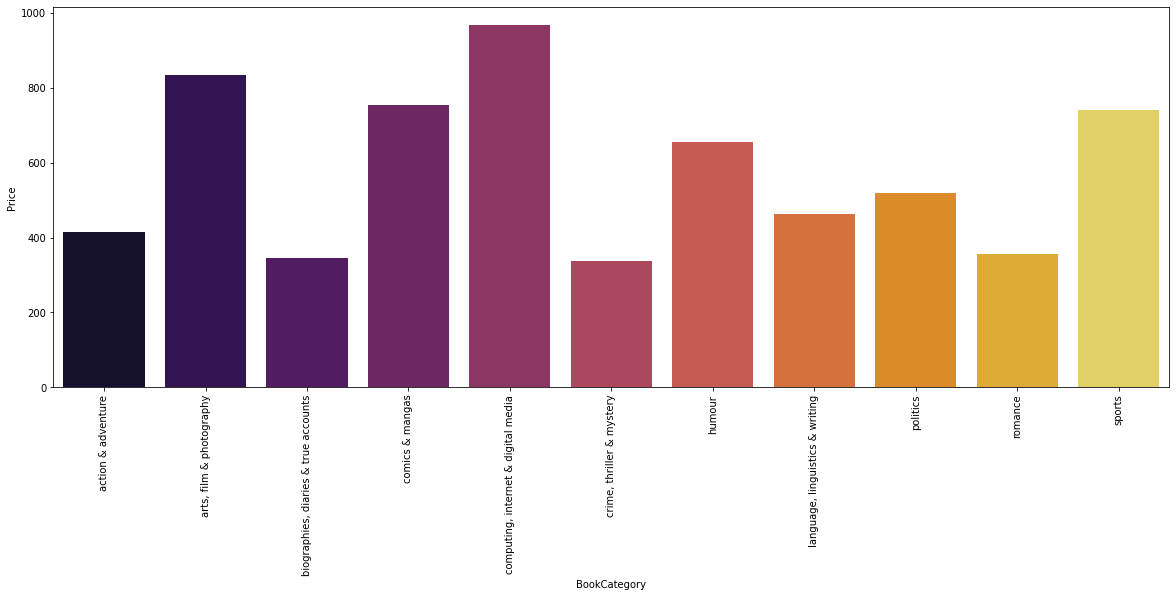

In [60]:
plt.figure(figsize=(20,7))
sns.barplot(data=train,x='BookCategory',y='Price',palette='inferno',ci=None,order=sorted(train['BookCategory'].unique()),hue=None)
plt.xticks(rotation=90)
plt.show()

In [61]:
## numerical features

<AxesSubplot:xlabel='Price', ylabel='Count'>

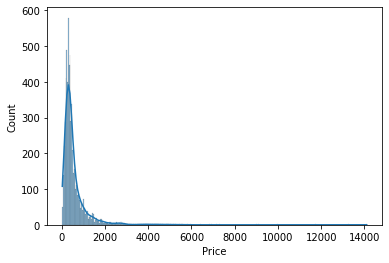

In [80]:
sns.histplot(x = train['Price'], kde=True)

In [62]:
train_num = train.select_dtypes(exclude = ["object"])
train_num.dtypes

Reviews    float64
Ratings      int64
Price      float64
dtype: object

https://stats.stackexchange.com/questions/20793/what-is-gaussianity-and-how-do-you-perform-gaussianity-testing-in-macroeconom

In [65]:
#Function to check the distribution across the numeric data in the dataset
def distribution_check(df,Cols):
    plt.figure(figsize=(25,7))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1

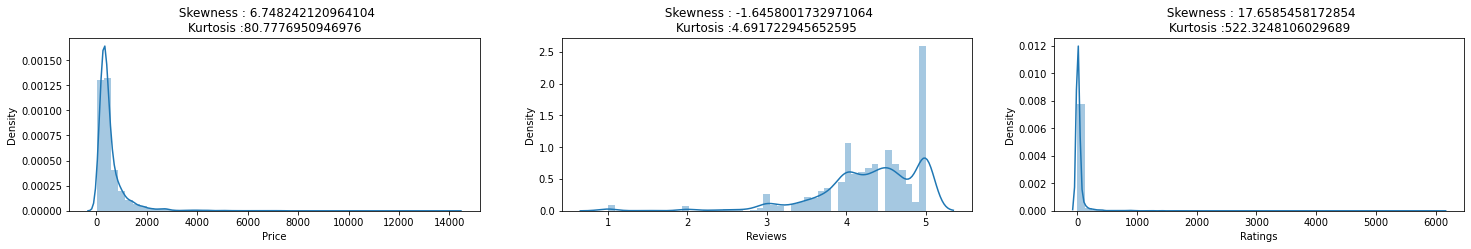

In [72]:
distribution_check(train,['Price','Reviews','Ratings'])

<AxesSubplot:>

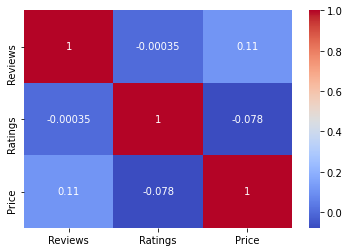

In [83]:
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')


In [84]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()

In [85]:
train[['Reviews']] = power.fit_transform(train[['Reviews']])
train[['Ratings']] = power.fit_transform(train[['Ratings']])
train[['Price']] = power.fit_transform(train[['Price']])

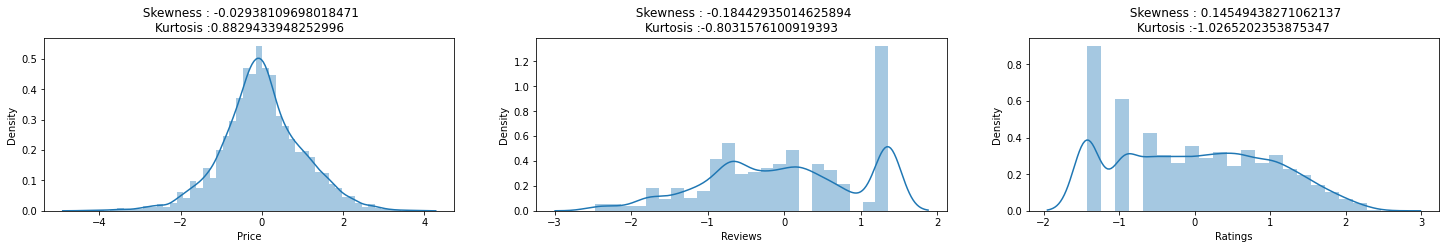

In [86]:
distribution_check(train,['Price','Reviews','Ratings'])

In [87]:
test[['Reviews']] = power.transform(test[['Reviews']])
test[['Ratings']] = power.transform(test[['Ratings']])

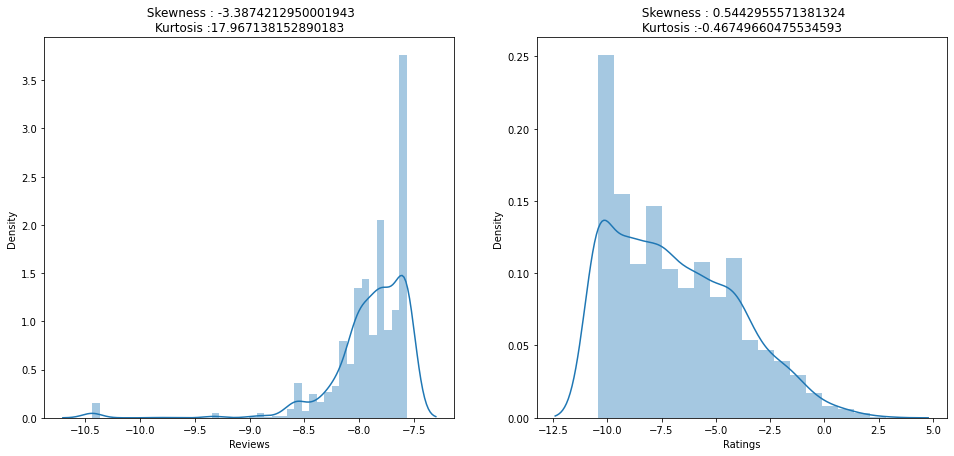

In [88]:
distribution_check(test,['Reviews','Ratings'])

In [89]:
train.drop(columns=['Edition','Synopsis','Title'],inplace=True)
test.drop(columns=['Edition','Synopsis','Title'],inplace=True)

In [90]:
len(train.Author.unique())

3670

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        6237 non-null   object 
 1   Reviews       6237 non-null   float64
 2   Ratings       6237 non-null   float64
 3   Genre         6237 non-null   object 
 4   BookCategory  6237 non-null   object 
 5   Price         6237 non-null   float64
 6   Edition_Year  6237 non-null   object 
dtypes: float64(3), object(4)
memory usage: 341.2+ KB


In [93]:
# let's transform the objects into categories =)

In [94]:
train = train.astype({'Author':'category','Genre':'category','BookCategory':'category','Edition_Year':'category'})

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        6237 non-null   category
 1   Reviews       6237 non-null   float64 
 2   Ratings       6237 non-null   float64 
 3   Genre         6237 non-null   category
 4   BookCategory  6237 non-null   category
 5   Price         6237 non-null   float64 
 6   Edition_Year  6237 non-null   category
dtypes: category(4), float64(3)
memory usage: 354.2 KB


In [96]:
test = test.astype({'Author':'category','Genre':'category','BookCategory':'category','Edition_Year':'category'})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        1560 non-null   category
 1   Reviews       1560 non-null   float64 
 2   Ratings       1560 non-null   float64 
 3   Genre         1560 non-null   category
 4   BookCategory  1560 non-null   category
 5   Edition_Year  1560 non-null   category
dtypes: category(4), float64(2)
memory usage: 87.1 KB


In [97]:
y=train.pop('Price')

In [98]:
df = pd.concat(objs=[train,test],axis=0)
df.head()

,Author,Reviews,Ratings,Genre,BookCategory,Edition_Year
0,chris kuzneski,-0.688861,0.138231,action & adventure,action & adventure,2016
1,arun khopkar,-0.834876,0.526742,cinema & broadcast,"biographies, diaries & true accounts",2012
2,thomas hobbes,0.853798,-0.076231,international relation,humour,1982
3,agatha christie,-0.533420,0.477727,contemporary fiction,"crime, thriller & mystery",2017
4,editors of life,1.359627,-1.427835,photography,"arts, film & photography",2006


In [100]:
le = LabelEncoder()

In [101]:
cols_toEncode = ['Author','Genre','BookCategory','Edition_Year']

In [102]:
df['Author'] = le.fit_transform(df['Author'])
df['Genre'] = le.fit_transform(df['Genre'])
df['BookCategory'] = le.fit_transform(df['BookCategory'])
df['Edition_Year'] = le.fit_transform(df['Edition_Year'])



In [103]:
train_size = len(train)

In [104]:
train = df[:train_size]
test = df[train_size:]

In [105]:
train = train.astype({'Author':'int','Genre':'int','BookCategory':'int','Edition_Year':'int'})

In [106]:
test = test.astype({'Author':'int','Genre':'int','BookCategory':'int','Edition_Year':'int'})

In [107]:
## combining all the values for label encoding

In [108]:
train['Price'] = y

In [109]:
# Split data to test and train

In [110]:
y_train = train.pop('Price')
X_train = train

> https://en.wikipedia.org/wiki/LightGBM
    LightGBM, short for Light Gradient Boosting Machine, is a free and open source distributed gradient boosting framework for machine learning originally developed by Microsoft.[4][5] It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks. The development focus is on performance and scalability.

In [113]:
import lightgbm as lgb

In [114]:
#convert the dataset to lgbDataset
df_train = lgb.Dataset(X_train,y_train)

> LightGBM can use categorical features directly (without one-hot encoding). hows about 8x speed-up compared with one-hot encoding.

In [115]:
# specifiying either index, label of the categorical columns
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1', 'auc'],
    'learning_rate': 1,
    'categorical_feature':[0,3,4,5],
    'num_iterations':10000
}

In [116]:
rg = lgb.LGBMRegressor(**hyper_params)

In [117]:
rg.fit(X_train,y_train)


LGBMRegressor(categorical_feature=[0, 3, 4, 5], learning_rate=1,
              metric=['l1', 'auc'], num_iterations=10000,
              objective='regression', task='train')

In [118]:
y_pred_train = rg.predict(X_train)

In [119]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [120]:
y_pred_train

array([-0.76923323, -0.88586557, -0.33779669, ...,  0.05151625,
       -0.24906556, -0.38730439])

In [121]:
print("Train MSE:",np.sqrt(mean_squared_error(y_train,y_pred_train)))

Train MSE: 0.17225311354181036


In [122]:
print("Train r2_score:",r2_score(y_train, y_pred_train))

Train r2_score: 0.9703288648751522


In [123]:
# whohoooo
y_test_pred = rg.predict(test)

In [129]:
# predicting columns from test data

y_test_pred = pd.DataFrame(y_test_pred,columns=['Price'])

In [125]:
## https://en.wikipedia.org/wiki/Inverse_transform_sampling
predictions = power.inverse_transform(y_test_pred[['Price']])

In [126]:
pd.DataFrame(predictions,columns=['Price']).to_csv('my_submission_LightGBM.csv',index=None)


In [130]:
# putting it together

In [132]:
test['predictions'] = predictions
test.head()

,Author,Reviews,Ratings,Genre,BookCategory,Edition_Year,predictions
0,3757,-7.825036,1.143953,183,5,24,555.032629
1,1299,-7.569108,-10.436161,279,4,56,1100.872778
2,881,-7.569108,-8.014421,327,9,49,128.620404
3,162,-7.965493,-5.977825,300,4,54,474.194908
4,3247,-7.825036,-6.381285,231,7,49,474.820254
